### 플로이드

[백준 링크](https://www.acmicpc.net/problem/11404) []

+ n (1 <= n <= 100)개의 도시가 있고, 한 도시에서 출발하여 다른 도시에 도착하는 m (1 <= m <= 100,000)개의 버스가 있음
+ 각 버스는 한 번 사용할 때 필요한 비용이 있음
+ 모든 도시의 쌍 (A,B)에 대해서 도시 A에서 B로 가는 데 필요한 비용의 최솟값을 구하는 프로그램 작성하기

**입력 조건**  
+ 첫째 줄에 도시의 개수 n (1 <= n <= 100)이 주어짐
+ 둘째 줄에 버스의 개수 m (1 <= m <= 100,000)이 주어짐
+ 셋째 줄부터 m+2번째 줄까지 다음과 같은 버스의 정보가 주어짐  
  먼저 처음에는 그 버스의 출발 도시의 번호가 주어짐  
  버스의 정보는 버스의 시작 도시 a, 도착 도시 b, 한 번 타는데 필요한 비용 c로 이루어져 있음  
  시작 도시와 도착 도시가 같은 경우는 없음  
  비용은 100,000보다 작거나 같은 자연수  
+ 시작 도시와 도착 도시를 연결하는 노선은 하나가 아닐 수 있음

**출력 조건**  
+ n개의 줄을 출력해야 함
+ i번째 줄에 출력하는 j번째 숫자는 도시 i에서 j로 가는 데 필요한 최소 비용
+ 만약 i에서 j로 갈 수 없는 경우에는 그 자리에 0을 출력함

**입력 예시**  
5  
14  
1 2 2  
1 3 3  
1 4 1  
1 5 10  
2 4 2  
3 4 1  
3 5 1  
4 5 3  
3 5 10  
3 1 8  
1 4 2  
5 1 7  
3 4 2  
5 2 4  

**출력 예시**  
0 2 3 1 4  
12 0 15 2 5  
8 5 0 1 1  
10 7 13 0 3  
7 4 10 6 0

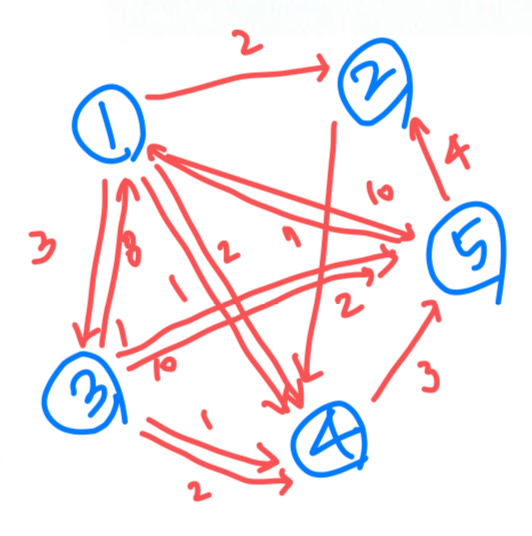

이건가..? 노선이 하나가 아닐수도있다는게 왕복을 말하는게아니라 3->4도 두개 있을수도있다 이런말인가,,?  
출력예시는 뭔소린지 진짜 모르겠어요 ㅠ

In [3]:
n = int(input())
m = int(input())

li = [[] for i in range(n+1)]
for _ in range(m):
    a, b, c = map(int, input().split())
    li[a].append((b,c))
print(li)

5
14
1 2 2
1 3 3
1 4 1
1 5 10
2 4 2
3 4 1
3 5 1
4 5 3
3 5 10
3 1 8
1 4 2
5 1 7
3 4 2
5 2 4
[[], [(2, 2), (3, 3), (4, 1), (5, 10), (4, 2)], [(4, 2)], [(4, 1), (5, 1), (5, 10), (1, 8), (4, 2)], [(5, 3)], [(1, 7), (2, 4)]]


In [ ]:
# 답안

INF = int(1e9)

n = int(input())
m = int(input())

#2차원 리스트를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n+1) for _ in range(n+1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n+1):
    for b in range(1, n+1):
        if a == b:
            graph[a][b] = 0
            
# 각 간선에 대한 정보를 입력받아, 그 값으로 초기화
for _ in range(m):
    # A에서 B로 가는 비용은 C라고 설정
    a, b, c = map(int, input().split())
    # 가장 짧은 간선 정보만 저장
    if c < graph[a][b]:
        graph[a][b] = c

# 점화식에 따라 플로이드 워셜 알고리즘 수행
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1, n+1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 수행된 결과를 출력
for a in range(1, n+1):
    for b in range(1, n+1):
        # 도달할 수 없는 경우, 0을 출력
        if graph[a][b] == INF:
            print(0, end = " ")
        # 도달할 수 있는 경우 거리를 출력
        else:
            print(graph[a][b], end = " ")
    print()